# Try to estimate the projected uncertainties with larger statistics

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/quasidata/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [55]:
selected_overlay=dict()
for pair_type in pair_types:
    selected_overlay[pair_type]=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_'+pair_type+'.csv')
selected_overlay_concat = pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])
selected_CC1p0pi=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_cc1p0pi.csv')
selected_events=pd.read_csv('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/selected_events.csv')
print len(pd.concat([selected_overlay['1mu-1p'],selected_overlay['cosmic'],selected_overlay['other pairs']])),'events in the overlay'
print len(selected_CC1p0pi),'selected CC 1p 0pi pairs in overlay'
# overlay scaling
import json
overlay_scaling = json.load(open("/Users/erezcohen/Desktop/Projects/uBoone/write-ups/OnBeamOffBeam5e19/Figures/SelectedEvents/overlay_scaling.txt"))
overlay_scaling

9384 events in the overlay
7304 selected CC 1p 0pi pairs in overlay


{u'1mu-1p': 0.03578088045074869,
 u'CC 1p 0pi': 0.03578088045074869,
 u'N(Ovelay)/N(On)': 7.667022982362373,
 u'cosmic': 0.22106943595880704,
 u'other pairs': 0.03578088045074868}

In [5]:
genie_cc1p0pi = dict()
genie_cc1p0pi_cuts = dict()

In [44]:
mA_array = [0.6,0.7,0.8,0.9,0.95,0.99,1.05,1.1,1.2,1.3,1.4] 
for mA in mA_array:
    genie_sample = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/afro_genie_samples/CC_100k_mA_%.2f.csv'%mA)
    genie_cc1p0pi[mA] = genie_sample[genie_sample['IsCC_1p_200MeVc_0pi']==True]
    print len(genie_cc1p0pi[mA]),'CC1p0π events in GENIE samples with mA=%.2f'%mA
    sim = genie_cc1p0pi[mA]
    sim_FV = sample_in_FV(sample=sim)
    genie_cc1p0pi_cuts[mA] = sim_FV[sim_FV['reco_l_mu']>sim_FV['reco_l_p']]
    print len(genie_cc1p0pi_cuts[mA]),'genie cc1p0π after cuts'

28507 CC1p0π events in GENIE samples with mA=0.60
9557 genie cc1p0π after cuts
30599 CC1p0π events in GENIE samples with mA=0.70
10092 genie cc1p0π after cuts
32163 CC1p0π events in GENIE samples with mA=0.80
10651 genie cc1p0π after cuts
33824 CC1p0π events in GENIE samples with mA=0.90
10897 genie cc1p0π after cuts
34543 CC1p0π events in GENIE samples with mA=0.95
11106 genie cc1p0π after cuts
34849 CC1p0π events in GENIE samples with mA=0.99
10983 genie cc1p0π after cuts
35749 CC1p0π events in GENIE samples with mA=1.05
11151 genie cc1p0π after cuts
36196 CC1p0π events in GENIE samples with mA=1.10
11245 genie cc1p0π after cuts
37239 CC1p0π events in GENIE samples with mA=1.20
11366 genie cc1p0π after cuts
38042 CC1p0π events in GENIE samples with mA=1.30
11411 genie cc1p0π after cuts
38810 CC1p0π events in GENIE samples with mA=1.40
11409 genie cc1p0π after cuts


# compare overlay to GENIE samples 

## truth - $p_p$

done.


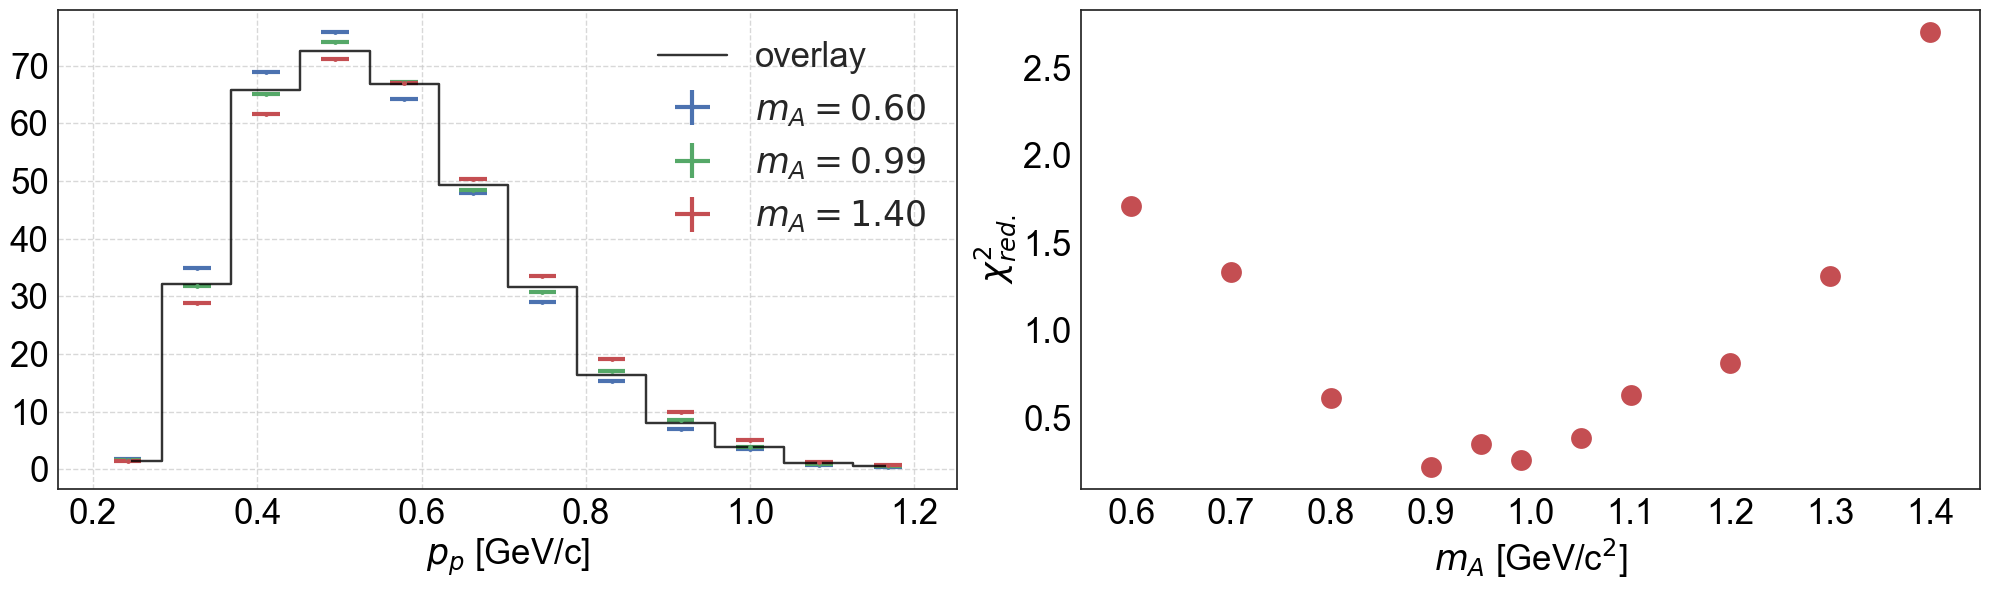

In [112]:
bins = linspace(0.2,1.21,13); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0.2,1.2)
x_label=r'$p_p$ [GeV/c]'
var='truth_Pp'
fig=plt.figure(figsize=(20,6));
ax=fig.add_subplot(1,2,1)
h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                                              , ax=ax , overlay_scaling=overlay_scaling , var=var
                                              , bins=bins, do_individual_histograms=False)

results = pd.DataFrame(columns=['mA','chi2/ndf'])
for mA in mA_array:
    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim = genie_cc1p0pi[mA]
        sim_in_bin = sim[(bins[i]<sim[var])& (sim[var]<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['uBacc_truth_proton'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['uBacc_truth_proton'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)
    chi2,ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=hsim    , h1err=hsim_err
                                     , h2=h_stack , h2err=h_stack_err
                                     , debug=0 if mA==0.99 else 0)    
    results = results.append(pd.DataFrame({'mA':mA,'chi2/ndf':(chi2/ndf)},index=[mA]))
    if mA in [0.6,0.99,1.4]: 
        plt.errorbar(x=mid,xerr=0.2*(mid[1]-mid[0]),y=hsim,yerr=0,fmt='.',label='$m_A=%.2f$'%mA,linewidth=3) # 
set_axes(ax,x_label,do_add_legend=True)
ax=fig.add_subplot(1,2,2)
plt.errorbar(x=results['mA'],xerr=0,y=results['chi2/ndf'],yerr=0,fmt='ro',color='red',markersize=15)
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$\chi^2_{red.}$',xlim=(0.55,1.45))
plt.tight_layout()
print 'done.'

## reco. - $p_p$

done.


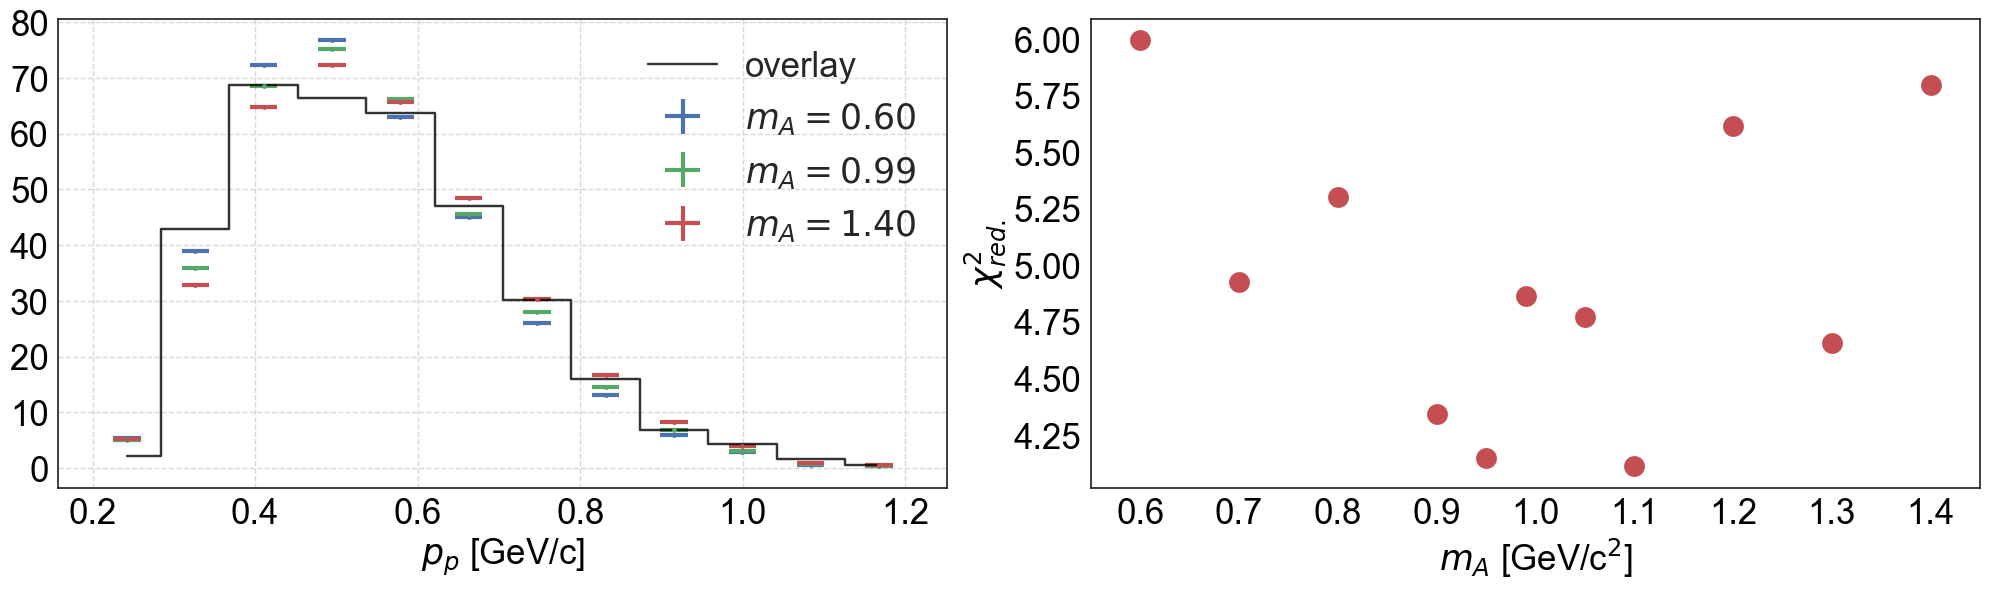

In [46]:
bins = linspace(0.2,1.21,13); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0.2,1.2)
x_label=r'$p_p$ [GeV/c]'
var='reco_Pp'
fig=plt.figure(figsize=(20,6));
ax=fig.add_subplot(1,2,1)
h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=selected_overlay, norm=len(selected_events)
                                              , ax=ax , overlay_scaling=overlay_scaling , var=var
                                              , bins=bins, do_individual_histograms=False)

results = pd.DataFrame(columns=['mA','chi2/ndf'])
for mA in mA_array:
    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim = genie_cc1p0pi[mA]
        sim_in_bin = sim[(bins[i]<sim[var])& (sim[var]<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['uBacc_truth_proton'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['uBacc_truth_proton'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)
    chi2,ndf = chi2_two_histograms( bins=bins, chi2_xrange=chi2_xrange                                     
                                     , h1=hsim    , h1err=hsim_err
                                     , h2=h_stack , h2err=h_stack_err
                                     , debug=0 if mA==0.99 else 0)    
    results = results.append(pd.DataFrame({'mA':mA,'chi2/ndf':(chi2/ndf)},index=[mA]))
    if mA in [0.6,0.99,1.4]: 
        plt.errorbar(x=mid,xerr=0.2*(mid[1]-mid[0]),y=hsim,yerr=0,fmt='.',label='$m_A=%.2f$'%mA,linewidth=3) # 
set_axes(ax,x_label,do_add_legend=True)
ax=fig.add_subplot(1,2,2)
plt.errorbar(x=results['mA'],xerr=0,y=results['chi2/ndf'],yerr=0,fmt='ro',color='red',markersize=15)
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$\chi^2_{red.}$',xlim=(0.55,1.45))
plt.tight_layout()
print 'done.'

# sample a small subset of events from the overlay - to study the impact of statistics

In [47]:
bins = linspace(0.2,1.21,13); mid=0.5*(bins[1:]+bins[:-1])
chi2_xrange = (0.2,1.2)
x_label=r'$p_p$ [GeV/c]'
var='reco_Pp'

In [117]:
Nrand = 350
Nexpriments = 1000
results_experiments = pd.DataFrame(columns=mA_array)

hsim,hsim_err = dict(),dict()
for mA in mA_array:
    hsim[mA],hsim_err[mA]=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim = genie_cc1p0pi[mA]
        sim_in_bin = sim[(bins[i]<sim[var])& (sim[var]<bins[i+1])]
        hsim[mA][i] = np.sum(sim_in_bin['uBacc_truth_proton'])
        hsim_err[mA][i] = np.sqrt(np.sum(np.square(sim_in_bin['uBacc_truth_proton'])))
    hsim_err[mA] = np.array(hsim_err[mA])*float(len(selected_events))/np.sum(hsim[mA])
    hsim[mA] = np.array(hsim[mA])*float(len(selected_events))/np.sum(hsim[mA])

for i in range(Nexpriments):    
    if Nexpriments>10 and i%(Nexpriments/10)==0: print 'running quasiexperiment',i
    quasidataSamples = dict()
    nrand = dict()
    for pair_type in pair_types:#{
        nrand[pair_type] = int(len(selected_overlay[pair_type])*Nrand/len(selected_overlay_concat))
        quasidataSamples[pair_type] = selected_overlay[pair_type].sample(n=nrand[pair_type])
    h_data ,h_data_err = plot_stacked_MCsamples( OverlaySamples=quasidataSamples, norm=len(selected_events)
                                                , do_draw=False, ax=ax 
                                                , overlay_scaling=overlay_scaling , var=var
                                                , bins=bins, do_individual_histograms=False)
    res = dict()
    for mA in mA_array:
        chi2,ndf = chi2_two_histograms( bins=bins
                                       , chi2_xrange=chi2_xrange                                         
                                       , h1=hsim[mA], h1err=hsim_err[mA]                                       
                                       , h2=h_data , h2err=h_data_err                                       
                                       , debug=0 if mA==0.99 else 0)    
        res[mA] = (chi2/ndf)
    results_experiments.loc[i] = res
print 'done running %d quasiexperiments.'%Nexpriments

running quasiexperiment 0
running quasiexperiment 100
running quasiexperiment 200
running quasiexperiment 300
running quasiexperiment 400
running quasiexperiment 500
running quasiexperiment 600
running quasiexperiment 700
running quasiexperiment 800
running quasiexperiment 900
done running 1000 quasiexperiments.


done.


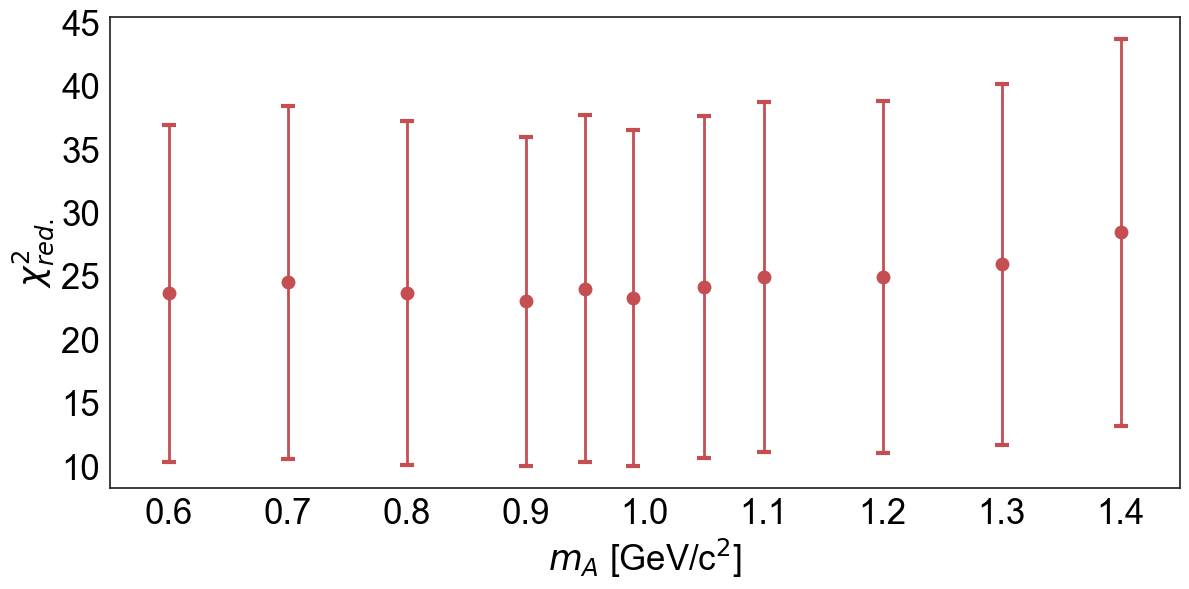

In [118]:
fig=plt.figure(figsize=(12,6));
ax=fig.add_subplot(1,1,1)
chi2_mean,chi2_std = [],[]
for mA in mA_array:
    chi2_mean.append(np.mean(results_experiments[mA]))
    chi2_std.append(np.std(results_experiments[mA]))
plt.errorbar( x=mA_array,y=chi2_mean,yerr=chi2_std , fmt='ro',markersize=10,linewidth=2,capsize=5,capthick=3)
set_axes(ax,r'$m_A$ [GeV/c$^2$]','$\chi^2_{red.}$',xlim=(0.55,1.45))
plt.tight_layout()
print 'done.'

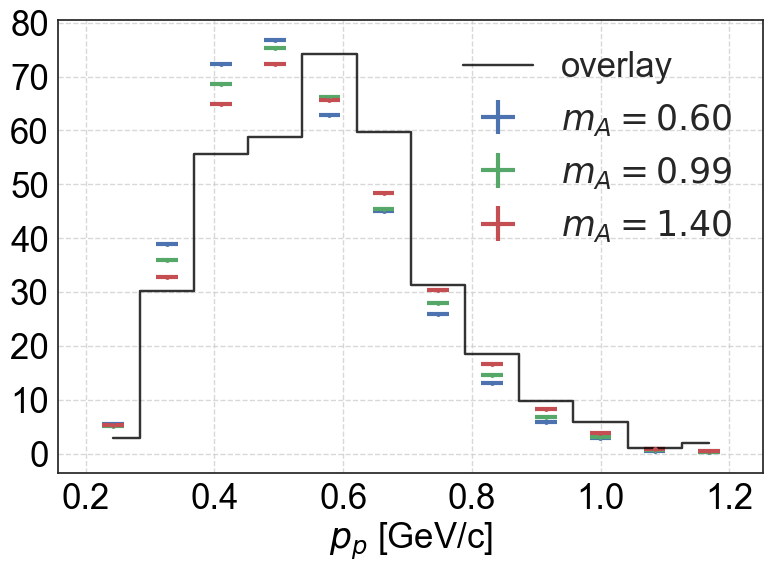

In [99]:
fig=plt.figure(figsize=(20,6));
ax=fig.add_subplot(1,2,1)
h_stack ,h_stack_err = plot_stacked_MCsamples( OverlaySamples=quasidataSamples, norm=len(selected_events)
                                              , ax=ax , overlay_scaling=overlay_scaling , var=var
                                              , bins=bins, do_individual_histograms=False)

for mA in mA_array:
    hsim,hsim_err=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
    for i in range(len(bins)-1):
        sim = genie_cc1p0pi[mA]
        sim_in_bin = sim[(bins[i]<sim[var])& (sim[var]<bins[i+1])]
        hsim[i] = np.sum(sim_in_bin['uBacc_truth_proton'])
        hsim_err[i] = np.sqrt(np.sum(np.square(sim_in_bin['uBacc_truth_proton'])))
    hsim_err = np.array(hsim_err)*float(np.sum(h_stack))/np.sum(hsim)
    hsim = np.array(hsim)*float(np.sum(h_stack))/np.sum(hsim)
    if mA in [0.6,0.99,1.4]: 
        plt.errorbar(x=mid,xerr=0.2*(mid[1]-mid[0]),y=hsim,yerr=0,fmt='.',label='$m_A=%.2f$'%mA,linewidth=3) # 
set_axes(ax,x_label,do_add_legend=True)